In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

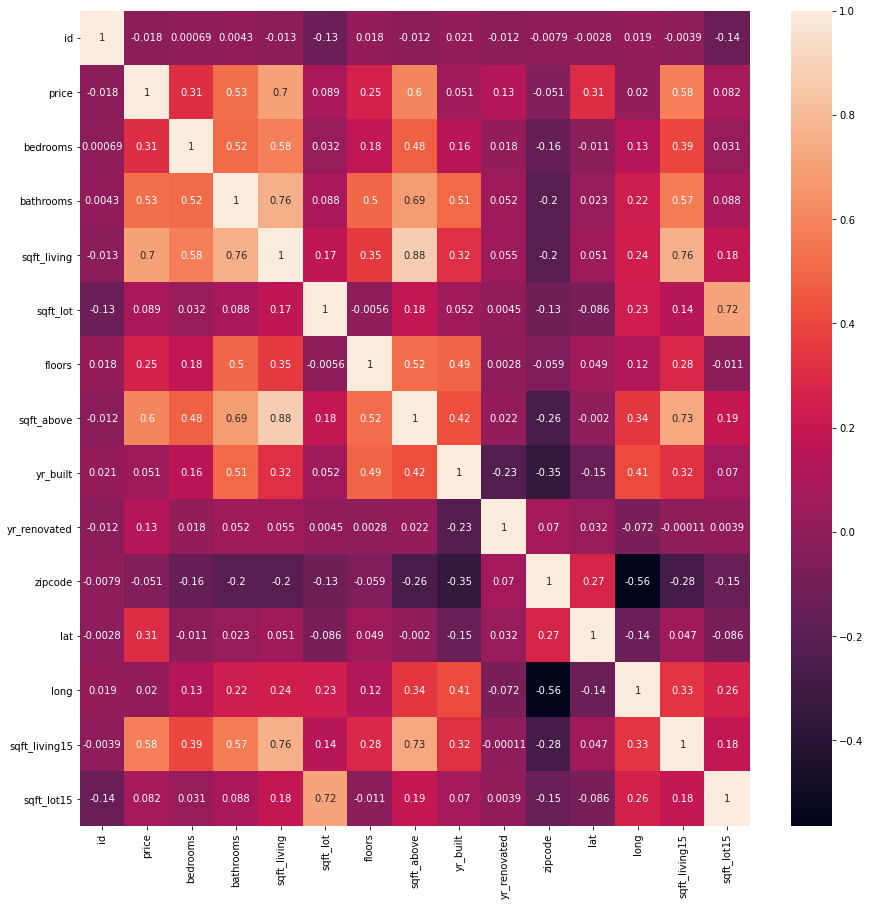

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement', 'zipcode', 'yr_built'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
2495,300000.00,6,3.00,2400,9373,NONE,7 Average
6729,647500.00,4,1.75,2060,26036,NONE,8 Good
8404,400000.00,3,1.00,1460,43000,NONE,7 Average
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average
3553,402500.00,4,2.00,1650,3504,NONE,7 Average


In [12]:
df_copy.grade = [x.replace(" ", "_").strip() for x in df_copy.grade]

In [13]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [14]:
df_copy = df_copy[df_copy['bedrooms'] != 33] #

In [15]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [16]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [17]:
df_copy = df_copy.dropna(subset = ['view'])

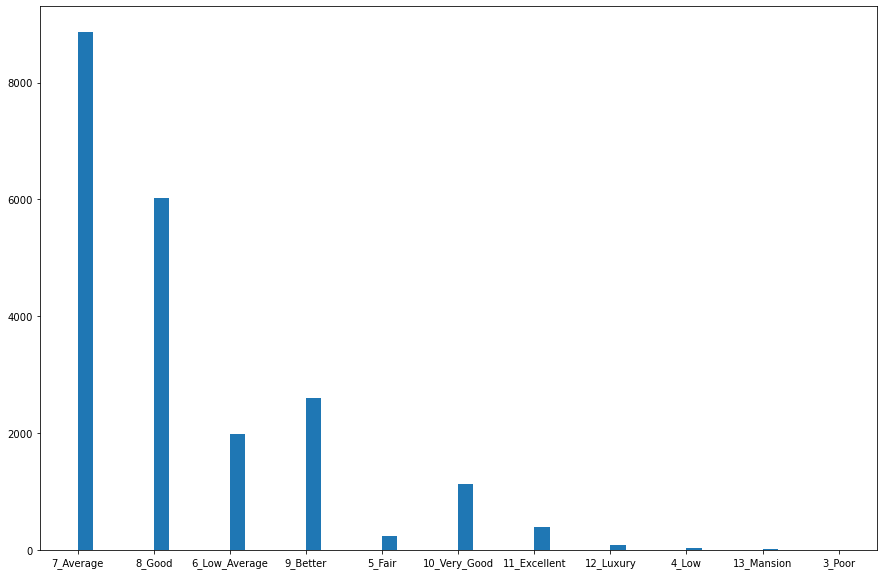

In [18]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.hist(df_copy['grade'], bins = 50);

In [19]:
#fig, ax = plt.subplots(figsize = (15, 10))

#ax.barh(df_copy['grade'], width = df_copy['price']);

In [20]:
df_copy.describe()

,price,sqft_living,sqft_lot
count,21356.00,21356.00,21356.00
mean,541620.55,2082.66,15119.66
std,366247.73,918.16,41499.47
min,78000.00,370.00,520.00
25%,324950.00,1430.00,5040.00
50%,450000.00,1920.00,7613.50
75%,645000.00,2550.00,10696.25
max,7700000.00,13540.00,1651359.00


There is a max of $7.7 mil house 

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


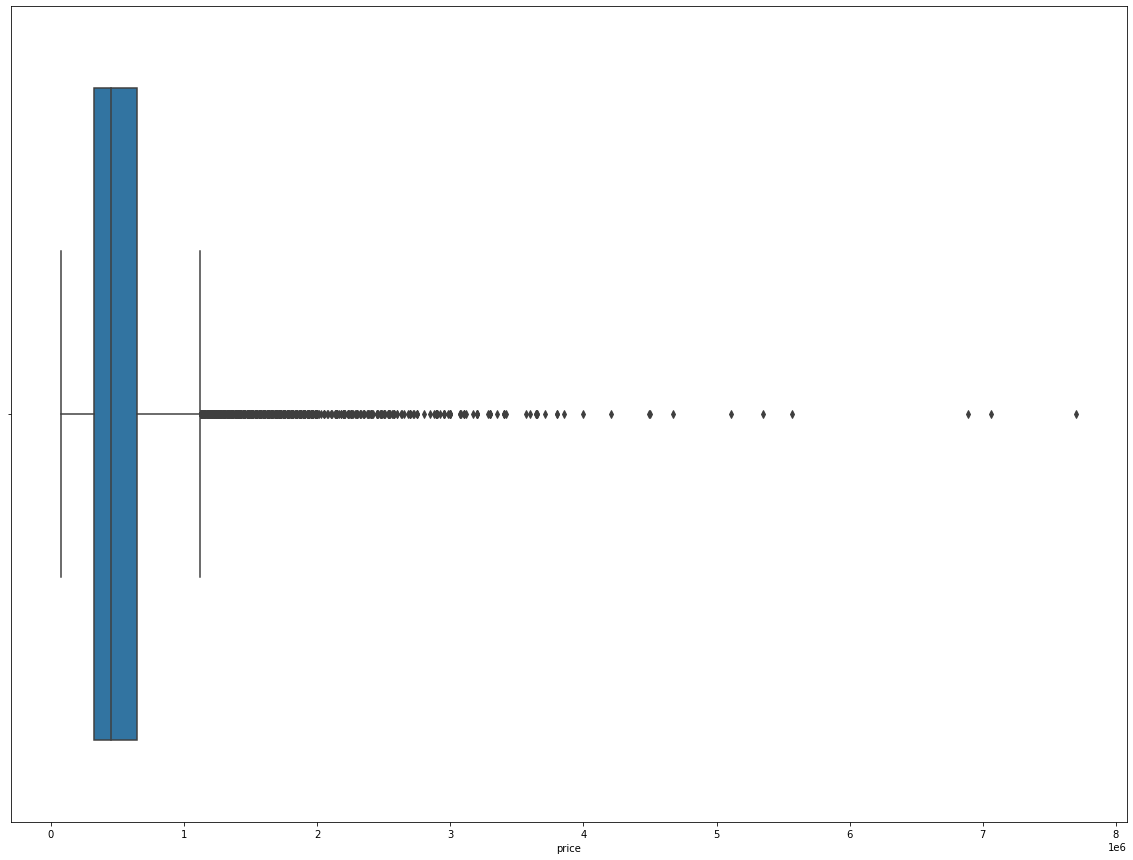

In [21]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(df_copy['price']);

In [22]:
#mean IQR 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_copy['price'].mean()- (iqr*1.5)

upper_limit = df_copy['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(61545.54813635512, 1021695.5481363551)

In [23]:
#Finding where our outliers are in terms of how far they are from the IQR
#using median here because mean takes the 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit2 = df_copy['price'].median()- (iqr*1.5)

upper_limit2 = df_copy['price'].median()+ (iqr*1.5)

lower_limit2, upper_limit2

(-30075.0, 930075.0)

In [24]:
df_copy[(df_copy['price'] >  930075)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion
11912,1440000.00,4,3.0,3720,5000,NONE,9_Better


In [25]:
df_copy[(df_copy['price'] >  1021695)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
18640,1390000.00,3,1.25,2400,6653,AVERAGE,11_Excellent
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion


In [26]:
#droppped big outliers base on median price, narrowing down the market
df_copy = df_copy[df_copy['price'] < upper_limit2]

In [27]:
df_copy['price'] = np.log(df_copy['price'])

# SPLIT

In [28]:
X = df_copy.drop(columns = 'price')

In [29]:
y = df_copy.price

In [30]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [32]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [33]:
# Baseline model for train split
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X_t = X_train
y_t = y_train

# Fit
dummy_lr.fit(X_t,y_t)

# Score
dummy_lr.score(X_t,y_t)

#predict
dummy_pred1 = dummy_lr.predict(X_t)

#RMSE
print(mean_squared_error(np.exp(y_t), np.exp(dummy_pred1), squared=False))
print(r2_score(y_t, dummy_pred1))

187495.23467748653
0.0


In [34]:
# Baseline model for test split

# Create variables
X_test1 = X_test
y_test1 = y_test

# Score
dummy_lr.score(X_test1,y_test1)

#predict
dummy_pred2 = dummy_lr.predict(X_test1)

#RMSE
print(mean_squared_error(np.exp(y_test1), np.exp(dummy_pred2), squared=False))
print(r2_score(y_test1,dummy_pred2))

191593.25713854496
-0.0006737363324191836


In [35]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [36]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     6435.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:32:01   Log-Likelihood:                -4576.3
No. Observations:               13079   AIC:                             9157.
Df Residuals:                   13077   BIC:                             9172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3181      0.008   1461.758      0.000      12.302      12.335
sqft_living     0.0003   4.06e-06     80.219      0.000       0.000       0.000
==============================================================================
Omnibus:                      217.437   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.971
Skew:                          -0.159   Prob(JB):                     3.68e-34
Kurtosis:                       2.573   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

1065    12.56
1834    12.76
7073    12.89
12868   12.69
7464    13.03
         ... 
8310    12.87
10116   12.87
7361    13.24
9906    12.74
18308   13.40
Length: 13079, dtype: float64

In [38]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

19314   12.89
5187    12.96
20683   13.05
6610    12.79
701     12.59
         ... 
303     12.98
13531   12.59
11458   13.20
295     13.41
944     13.02
Length: 6443, dtype: float64

In [39]:
####THIS IS THE SKLEARN WAY OF GETTING THE R2 COMPARED TO STATSMODEL WHERE IT GIVES US IN THE SUMMARY
r2_score(y_test,simple_test_preds)

0.32127918002694345

In [40]:
r2_score(y_train,simple_train_preds) #SAME AS THE R-SQUARED IN THE SUMMARY ABOVE FOR TRAIN

0.3298023712357706

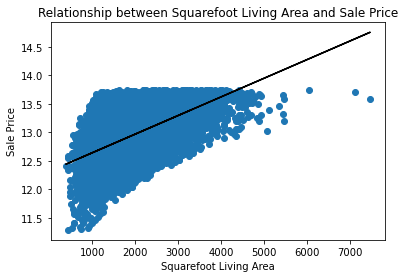

In [41]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

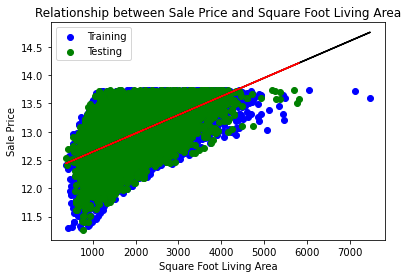

In [42]:
#THIS IS TESTING 
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

# Statistical Analysis on Train_DF

In [43]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price      sqft_living        sqft_lot          
           mean  std        mean    std     mean       std
view                                                      
AVERAGE   13.21 0.35     2277.96 852.69 22794.68  58477.81
EXCELLENT 13.39 0.29     2377.34 987.20 25180.64  47687.65
FAIR      13.23 0.34     2237.72 776.71 12036.26  19214.40
GOOD      13.26 0.33     2447.38 771.18 40957.98 123982.28
NONE      12.93 0.42     1907.01 721.29 13527.72  34671.00

In [44]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [45]:
train_df['view'].value_counts()

NONE         12197
AVERAGE        448
GOOD           197
FAIR           169
EXCELLENT       68
Name: view, dtype: int64

In [46]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [47]:
train_df.grade.value_counts()

7_Average        5923
8_Good           3835
9_Better         1400
6_Low_Average    1315
10_Very_Good      394
5_Fair            158
11_Excellent       34
4_Low              18
12_Luxury           2
Name: grade, dtype: int64

In [48]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [49]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,price
1065,1,1.0,730,6890,NONE,4_Low,11.85
1834,3,1.75,1340,8000,NONE,7_Average,12.47
7073,3,2.5,1740,4960,NONE,8_Good,13.08
12868,3,1.0,1140,7028,NONE,8_Good,13.24
7464,4,2.5,2190,8100,NONE,8_Good,12.60


In [50]:
df3['grade'].value_counts()

7_Average        5923
8_Good           3835
9_Better         1400
6_Low_Average    1315
10_Very_Good      394
5_Fair            158
11_Excellent       34
4_Low              18
12_Luxury           2
Name: grade, dtype: int64

In [51]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10_Very_Good']
df_11 = train_df[train_df['grade'] == '11_Excellent']
df_12 = train_df[train_df['grade'] == '12_Luxury']
df_4 = train_df[train_df['grade'] == '4_Low']
df_5 = train_df[train_df['grade'] == '5_Fair']
df_6 = train_df[train_df['grade'] == '6_Low_Average']
df_7 = train_df[train_df['grade'] == '7_Average']
df_8 = train_df[train_df['grade'] == '8_Good']
df_9 = train_df[train_df['grade'] == '9_Better']

In [52]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [53]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 10_Very_Good  11_Excellent    0.055    0.9  -0.132  0.2419  False
 10_Very_Good     12_Luxury   0.1587    0.9 -0.5828  0.9002  False
 10_Very_Good         4_Low  -1.4647  0.001 -1.7168 -1.2126   True
 10_Very_Good        5_Fair  -1.1916  0.001 -1.2901 -1.0932   True
 10_Very_Good 6_Low_Average    -0.97  0.001 -1.0301 -0.9099   True
 10_Very_Good     7_Average  -0.6824  0.001 -0.7368 -0.6279   True
 10_Very_Good        8_Good  -0.4214  0.001 -0.4767  -0.366   True
 10_Very_Good      9_Better   -0.167  0.001 -0.2266 -0.1073   True
 11_Excellent     12_Luxury   0.1038    0.9 -0.6573  0.8648  False
 11_Excellent         4_Low  -1.5197  0.001 -1.8246 -1.2148   True
 11_Excellent        5_Fair  -1.2466  0.001 -1.4443 -1.0489   True
 11_Excellent 6_Low_Average  -1.0249  0.001 -1.2066 -0.8433   

In [54]:
df3.view.value_counts()

NONE         12197
AVERAGE        448
GOOD           197
FAIR           169
EXCELLENT       68
Name: view, dtype: int64

In [55]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade'],
      dtype='object')

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13079 entries, 1065 to 18308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     13079 non-null  object 
 1   bathrooms    13079 non-null  object 
 2   sqft_living  13079 non-null  int64  
 3   sqft_lot     13079 non-null  int64  
 4   view         13079 non-null  object 
 5   grade        13079 non-null  object 
 6   price        13079 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 817.4+ KB


# OHE AND SCALING TRAIN AND TEST

In [57]:
scaler = StandardScaler()

#calling to certain columns
continous = [c for c in df3.columns if (df3[c].dtype == 'int64')| (df3[c].dtype == 'float64')]

ct = ColumnTransformer(transformers=[('scale', scaler, continous)],
                       remainder='passthrough')
ct.fit(df3)

# Transform training data

X_train_scaled = ct.transform(df3)
X_train_scaled

# Scaling  testing data
X_test_scaled = ct.transform(test_df)
X_test_scaled

array([[-0.2533386707891941, -0.07788451101824065, -1.3186518429926717,
        ..., '2.5', 'NONE', '7_Average'],
       [0.044504062941103234, 0.9928203775552634, 1.037223578363232, ...,
        '1.75', 'NONE', '8_Good'],
       [0.40056151280959507, -0.21156717712933434, -0.6711900989534572,
        ..., '2.5', 'NONE', '7_Average'],
       ...,
       [1.0328004066825445, -0.11633537647084546, 1.6768737575746546,
        ..., '2.75', 'NONE', '9_Better'],
       [1.9263286078734365, 0.18851084464983836, 1.7568671071902258, ...,
        '2.5', 'NONE', '10_Very_Good'],
       [0.28819357235680104, 0.22474817386358042, -0.009772405896681303,
        ..., '1.5', 'NONE', '7_Average']], dtype=object)

In [58]:
scaled_df = pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out())
X_test_scale = pd.DataFrame(X_test_scaled, columns = ct.get_feature_names_out())

In [59]:
scaled_df

,scale__sqft_living,scale__sqft_lot,scale__price,remainder__bedrooms,remainder__bathrooms,remainder__view,remainder__grade
0,-1.63,-0.19,-2.62,1,1.0,NONE,4_Low
1,-0.81,-0.16,-1.15,3,1.75,NONE,7_Average
2,-0.27,-0.24,0.30,3,2.5,NONE,8_Good
3,-1.08,-0.19,0.68,3,1.0,NONE,8_Good
4,0.34,-0.16,-0.83,4,2.5,NONE,8_Good
...,...,...,...,...,...,...,...
13074,-0.33,-0.25,-0.69,3,2.5,NONE,7_Average
13075,-0.32,-0.17,0.19,4,1.0,NONE,7_Average
13076,1.22,-0.13,1.04,4,2.5,NONE,10_Very_Good
13077,-0.89,-0.24,1.03,2,1.0,NONE,7_Average


In [60]:
scaled_df.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]
X_test_scale.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [61]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sqft_living  13079 non-null  object
 1   sqft_lot     13079 non-null  object
 2   price        13079 non-null  object
 3   bedrooms     13079 non-null  object
 4   bathrooms    13079 non-null  object
 5   view         13079 non-null  object
 6   grade        13079 non-null  object
dtypes: object(7)
memory usage: 715.4+ KB


In [62]:
#Convert to a function or loop
X_test_scale.sqft_living = X_test_scale.sqft_living.astype(float)
X_test_scale.sqft_lot = X_test_scale.sqft_lot.astype(float)
X_test_scale.price = X_test_scale.price.astype(float)

scaled_df.sqft_living = scaled_df.sqft_living.astype(float)
scaled_df.sqft_lot = scaled_df.sqft_lot.astype(float)
scaled_df.price = scaled_df.price.astype(float)

In [63]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  13079 non-null  float64
 1   sqft_lot     13079 non-null  float64
 2   price        13079 non-null  float64
 3   bedrooms     13079 non-null  object 
 4   bathrooms    13079 non-null  object 
 5   view         13079 non-null  object 
 6   grade        13079 non-null  object 
dtypes: float64(3), object(4)
memory usage: 715.4+ KB


In [64]:
cat_cols = [c for c in scaled_df.columns if scaled_df[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct2 = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct2.fit(scaled_df)
X_train_enc = ct2.transform(scaled_df)
X_train_enc

#OHE testing
X_test_enc = ct2.transform(X_test_scale)
X_test_enc

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<6443x51 sparse matrix of type '<class 'numpy.float64'>'
	with 45098 stored elements in Compressed Sparse Row format>

In [65]:
scaled_p_df = pd.DataFrame(X_train_enc.todense() ,columns= ct2.get_feature_names_out(), index = y_train.index)
scaled_test_df= pd.DataFrame(X_test_enc.todense(), columns= ct2.get_feature_names_out(), index = y_test.index)

In [66]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [67]:
scaled_p_df.head()

,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_6.0,bathrooms_6.75,bathrooms_7.5,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living,sqft_lot,price
1065,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.63,-0.19,-2.62
1834,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.81,-0.16,-1.15
7073,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.27,-0.24,0.30
12868,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.08,-0.19,0.68
7464,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.34,-0.16,-0.83


In [68]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

# No clue but it's only on training data/ Assumption testing?

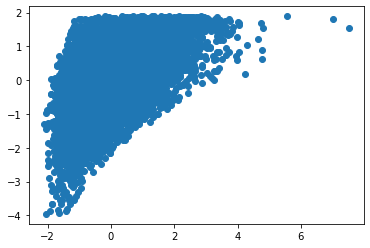

In [69]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = (scaled_p_df['price'])


ax.scatter(x, y);

In [70]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [71]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [72]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

#predict
dummy_pred = dummy_lr.predict(X)

#RMSE
mean_squared_error(np.exp(y), np.exp(dummy_pred), squared=False)

1.5382327269833

In [73]:
#Sk learn version
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

mean_squared_error(np.exp(y_s_p), np.exp(preds))

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


0.8217271223061189

In [74]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [75]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [76]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

,price
1065,-1.12
1834,-0.49
7073,0.13
12868,0.29
7464,-0.35
...,...
8310,-0.29
10116,0.08
7361,0.44
9906,0.44


In [77]:
#Create out bins

bins = int( len(X)**.5)
bins

114

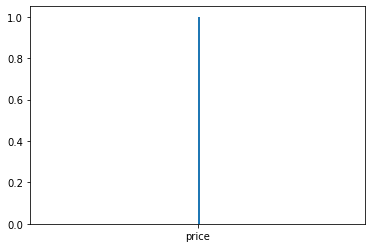

In [78]:
# FIX THIS GRAPH
#Histogram of residuals

plt.hist(resids, bins=bins);

In [79]:
print(resids.max())
resids.min()

price   0.81
dtype: float64


price   -1.68
dtype: float64

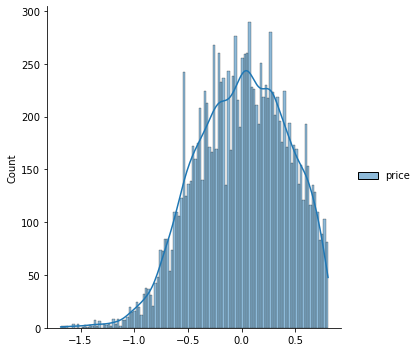

In [80]:
sns.displot(resids, bins=bins, kde=True)

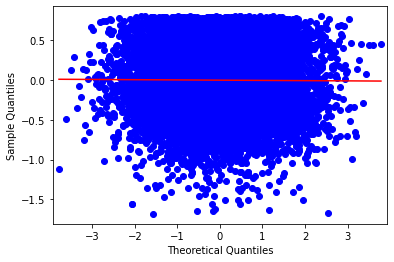

In [81]:
sm.qqplot(resids, line='r');

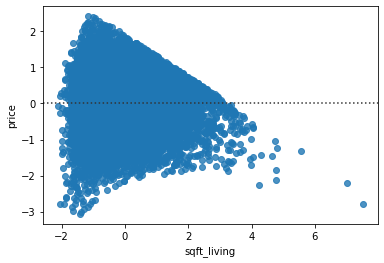

In [82]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

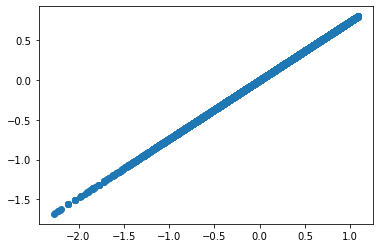

In [83]:
plt.scatter(preds, resids);

# Train df Modeling

In [84]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     6435.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:32:12   Log-Likelihood:                -15941.
No. Observations:               13079   AIC:                         3.189e+04
Df Residuals:                   13077   BIC:                         3.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.312e-15      0.007   3.23e-13      1.000      -0.014       0.014
sqft_living     0.5743      0.007     80.219      0.000       0.560       0.588
==============================================================================
Omnibus:                      217.437   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.971
Skew:                          -0.159   Prob(JB):                     3.68e-34
Kurtosis:                       2.573   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

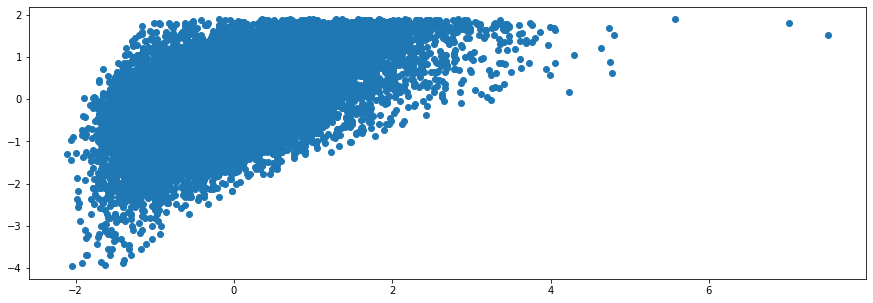

In [88]:
fig, ax = plt.subplots(figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

#x2 = scaled_and_parse_df[['bedrooms']]


ax.scatter(x1, y1)
# ax[1].scatter(x2,y1);

#plt.savefig('sqft_living&price.png')


In [89]:
#simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

#simple_model4 = ols(formula = simple_formula4,
#                   data = scaled_p_df).fit()

#simple_mod_summ4 = simple_model4.summary()

#simple_mod_summ4

In [90]:
#simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

#simple_model4 = ols(formula = simple_formula4,
#                   data = scaled_p_df).fit()

#simple_mod_summ4 = simple_model4.summary()

#simple_mod_summ4

In [91]:
#simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

#simple_model4 = ols(formula = simple_formula4,
#                   data = scaled_p_df).fit()

#simple_mod_summ4 = simple_model4.summary()

#simple_mod_summ4

In [92]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     2235.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:33:43   Log-Likelihood:                -15851.
No. Observations:               13079   AIC:                         3.171e+04
Df Residuals:                   13075   BIC:                         3.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3614      0.031     11.564      0.000       0.300       0.423
sqft_living     0.5609      0.007     78.112      0.000       0.547       0.575
view_GOOD      -0.0058      0.066     -0.088      0.930      -0.135       0.123
view_NONE      -0.3874      0.032    -12.055      0.000      -0.450      -0.324
==============================================================================
Omnibus:                      209.112   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.859
Skew:                          -0.169   Prob(JB):                     3.89e-34
Kurtosis:                       2.589   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [94]:
all_var = sm.OLS(y_train, sm.add_constant(no_y_train_df)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     214.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:33:44   Log-Likelihood:                -3507.4
No. Observations:               13079   AIC:                             7109.
Df Residuals:                   13032   BIC:                             7460.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.164e+10   1.33e+11     -0.313      0.754   -3.02e+11    2.19e+11
bedrooms_1            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_10           4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_11           4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_2            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_3            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_4            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_5            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_6            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_7            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_8            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bedrooms_9            4.34e+10   1.39e+11      0.313      0.754   -2.28e+11    3.15e+11
bathrooms_0.5       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_0.75      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_1.0       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_1.25      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_1.5       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_1.75      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_2.0       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_2.25      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_2.5       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_2.75      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_3.0       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_3.25      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_3.5       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_3.75      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_4.0       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_4.25      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_4.5       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_4.75      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_5.0       -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bathrooms_5.25      -1.762e+09   5.62e+09     -0.313      0.754   -1.28e+10    9.26e+09
bat

In [95]:
no_bathrooms = no_y_train_df[no_y_train_df.columns.drop(list(no_y_train_df.filter(regex='bathrooms')))]

In [96]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     402.4
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:33:44   Log-Likelihood:                -3571.9
No. Observations:               13079   AIC:                             7194.
Df Residuals:                   13054   BIC:                             7381.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -4.03e+10   1.37e+11     -0.293      0.769    -3.1e+11    2.29e+11
bedrooms_1            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_10           4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_11           4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_2            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_3            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_4            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_5            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_6            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_7            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_8            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
bedrooms_9            4.03e+10   1.37e+11      0.293      0.769   -2.29e+11     3.1e+11
view_AVERAGE           -0.0687      0.029     -2.389      0.017      -0.125      -0.012
view_EXCELLENT          0.1349      0.046      2.940      0.003       0.045       0.225
view_GOOD              -0.0564      0.033     -1.683      0.092      -0.122       0.009
view_NONE              -0.1887      0.025     -7.638      0.000      -0.237      -0.140
grade_10_Very_Good      1.0471      0.080     13.143      0.000       0.891       1.203
grade_11_Excellent      1.0564      0.095     11.064      0.000       0.869       1.244
grade_12_Luxury         0.5308      0.240      2.208      0.027       0.060       1.002
grade_5_Fair            0.2518      0.080      3.137      0.002       0.094       0.409
grade_6_Low_Average     0.4542      0.077      5.882      0.000       0.303       0.606
grade_7_Average         0.6758      0.077      8.754      0.000       0.524       0.827
grade_8_Good            0.8452      0.077     10.914      0.000       0.693       0.997
grade_9_Better          0.9733      0.078     12.461      0.000       0.820       1.126
sqft_living             0.1424      0.005     29.790      0.000       0.133       0.152
sqft_lot                0.0024      0.003      0.845      0.398      -0.003       0.008
==============================================================================
Omnibus:                       70.915   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.183
Skew:                          -0.095   Prob(JB):                     2.32e-13
Kurtosis:                       2.734   Cond. No.                     2.75e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [97]:
no_bathrooms_bedrooms = no_bathrooms[no_bathrooms.columns.drop(\
                                    list(no_bathrooms.filter(regex= 'bedrooms')))]

In [98]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     674.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:33:44   Log-Likelihood:                -3636.2
No. Observations:               13079   AIC:                             7302.
Df Residuals:                   13064   BIC:                             7415.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.4476      0.079    157.354      0.000      12.292      12.603
view_AVERAGE           -0.0684      0.029     -2.368      0.018      -0.125      -0.012
view_EXCELLENT          0.1454      0.046      3.156      0.002       0.055       0.236
view_GOOD              -0.0560      0.034     -1.664      0.096      -0.122       0.010
view_NONE              -0.1948      0.025     -7.854      0.000      -0.243      -0.146
grade_10_Very_Good      1.0019      0.078     12.800      0.000       0.848       1.155
grade_11_Excellent      1.0139      0.094     10.735      0.000       0.829       1.199
grade_12_Luxury         0.5277      0.241      2.192      0.028       0.056       0.999
grade_5_Fair            0.2266      0.080      2.848      0.004       0.071       0.383
grade_6_Low_Average     0.4165      0.076      5.485      0.000       0.268       0.565
grade_7_Average         0.6164      0.076      8.145      0.000       0.468       0.765
grade_8_Good            0.7880      0.076     10.375      0.000       0.639       0.937
grade_9_Better          0.9212      0.077     12.015      0.000       0.771       1.071
sqft_living             0.1302      0.004     33.411      0.000       0.123       0.138
sqft_lot                0.0030      0.003      1.044      0.296      -0.003       0.009
==============================================================================
Omnibus:                       99.590   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.333
Skew:                          -0.093   Prob(JB):                     4.38e-17
Kurtosis:                       2.678   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
no_bathrooms_bedrooms_lot = no_bathrooms_bedrooms.drop(columns = 'sqft_lot')

In [100]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms_lot)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     726.3
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:33:44   Log-Likelihood:                -3636.7
No. Observations:               13079   AIC:                             7301.
Df Residuals:                   13065   BIC:                             7406.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.4481      0.079    157.365      0.000      12.293      12.603
view_AVERAGE           -0.0676      0.029     -2.341      0.019      -0.124      -0.011
view_EXCELLENT          0.1461      0.046      3.172      0.002       0.056       0.236
view_GOOD              -0.0534      0.034     -1.591      0.112      -0.119       0.012
view_NONE              -0.1944      0.025     -7.840      0.000      -0.243      -0.146
grade_10_Very_Good      1.0015      0.078     12.795      0.000       0.848       1.155
grade_11_Excellent      1.0126      0.094     10.722      0.000       0.827       1.198
grade_12_Luxury         0.5252      0.241      2.182      0.029       0.053       0.997
grade_5_Fair            0.2264      0.080      2.846      0.004       0.070       0.382
grade_6_Low_Average     0.4159      0.076      5.477      0.000       0.267       0.565
grade_7_Average         0.6153      0.076      8.132      0.000       0.467       0.764
grade_8_Good            0.7868      0.076     10.361      0.000       0.638       0.936
grade_9_Better          0.9202      0.077     12.003      0.000       0.770       1.070
sqft_living             0.1307      0.004     33.793      0.000       0.123       0.138
==============================================================================
Omnibus:                      100.014   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.744
Skew:                          -0.094   Prob(JB):                     3.57e-17
Kurtosis:                       2.678   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This is all wrong now after fixing errors
No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Best model on test dataset 

Our simple model appears to under perform our test model by .02.

In [101]:
#getting the test data to the correct amount of columns through these steps, since our best model was 
#created from a train df that had less columns compared to what we initially started with
test_no_bedroom = scaled_test_df[scaled_test_df.columns.drop(\
                                    list(scaled_test_df.filter(regex= 'bedrooms')))]

In [102]:
test_no_bed_bath = test_no_bedroom[test_no_bedroom.columns.drop(\
                                    list(test_no_bedroom.filter(regex= 'bathrooms')))]

In [103]:
test_no_bed_bath_lot = test_no_bed_bath.drop(columns = ['sqft_lot'])

In [104]:
test_no_bed_bath_lot_price = test_no_bed_bath_lot.drop(columns = ['price'])

In [105]:
# Instatiating our model
model = LinearRegression()

model.fit(no_bathrooms_bedrooms_lot, y_train)

LinearRegression()

In [106]:
model.score(no_bathrooms_bedrooms_lot, y_train)

0.41949845882243375

In [107]:
no_bathrooms_bedrooms_lot

,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living
1065,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.63
1834,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.81
7073,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.27
12868,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.08
7464,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.33
10116,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.32
7361,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.22
9906,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.89


In [108]:
test_no_bed_bath_lot_price

,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living
19314,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.25
5187,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04
20683,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.40
6610,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.65
701,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.14
13531,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.49
11458,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.03
295,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.93


In [109]:
model.score(test_no_bed_bath_lot_price, y_test)

0.41462154767540305

In [110]:
train_preds = model.predict(no_bathrooms_bedrooms_lot)

test_preds = model.predict(test_no_bed_bath_lot_price)

In [111]:
r2_score(y_train, train_preds)

0.41949845882243375

In [112]:
mean_squared_error(np.exp(y_train), np.exp(train_preds), squared=False)

141784.9409942341

In [113]:
r2_score(y_test, test_preds)

0.41462154767540305

In [114]:
mean_squared_error(np.exp(y_test), np.exp(test_preds), squared=False)

144447.286760464

Our model explained the test variance better than our train by about 3%.

In [115]:
## Example function to fit, score model, and return score model & r2_score

#def scores(x,y):
#    regressor = LinearRegression()
#    regressor.fit(x,y)
#    y_pred = regressor.predict([[y]])
#    result1 = regressor.score(x,y)
#    result2 = r2_score(y,y_pred)
    
#    return
#    print("Model score is", result1)
#    print("r2_score is", result2)
    

In [116]:
#scores(no_bathrooms_bedrooms_lot, y_train)

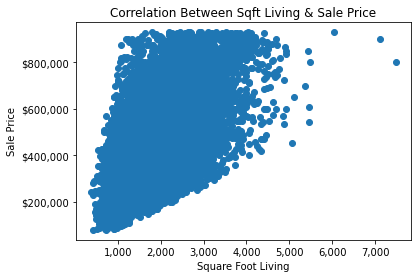

In [156]:
fig, ax = plt.subplots()

x = X_train['sqft_living']
y = np.exp(y_train) 

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));

ax.set_title('Correlation Between Sqft Living & Sale Price')
ax.set_xlabel('Square Foot Living')
ax.set_ylabel('Sale Price')


ax.scatter(x, y);
plt.savefig('sqftliving.png')

In [132]:
train_copy = train_df.copy()

In [133]:
train_copy.price = np.exp(train_copy.price)

In [134]:
grade_graph = train_copy.groupby('grade').mean()

In [152]:
grade_graph.sort_values('price', ascending= True, inplace = True)

In [153]:
grade_graph.price.sort_values

<bound method Series.sort_values of grade
4_Low           188558.33
5_Fair          246829.12
6_Low_Average   300375.79
7_Average       398466.41
8_Good          510340.76
9_Better        646908.47
10_Very_Good    751324.75
11_Excellent    793044.12
12_Luxury       867500.00
Name: price, dtype: float64>

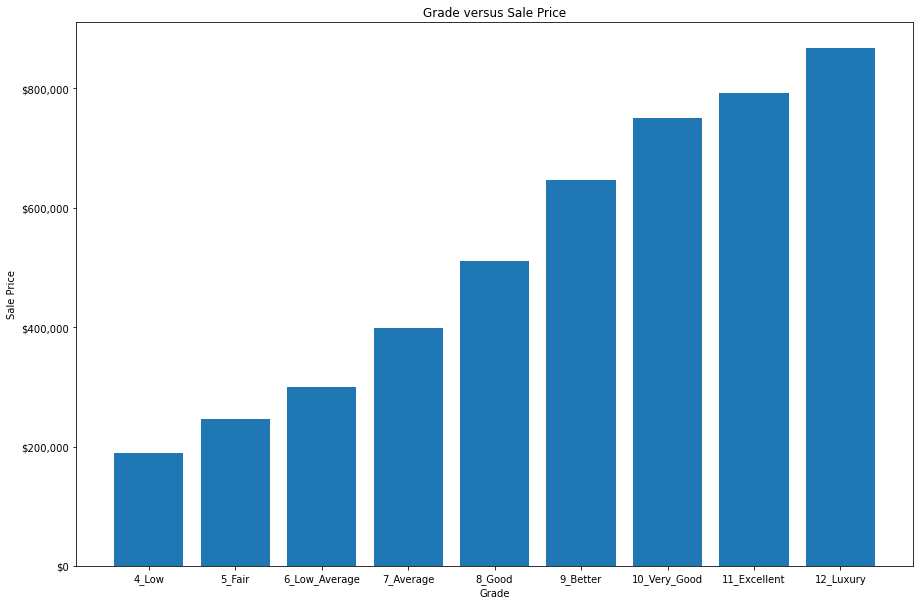

In [157]:
fig, ax = plt.subplots(figsize = (15, 10))

x = grade_graph.index
y = grade_graph['price'] 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_title('Grade versus Sale Price')
ax.set_xlabel('Grade')
ax.set_ylabel('Sale Price')


ax.bar(x, y)

plt.savefig('grade.png')

In [155]:
train_copy

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,price
1065,1,1.0,730,6890,NONE,4_Low,140000.00
1834,3,1.75,1340,8000,NONE,7_Average,260000.00
7073,3,2.5,1740,4960,NONE,8_Good,477000.00
12868,3,1.0,1140,7028,NONE,8_Good,560000.00
7464,4,2.5,2190,8100,NONE,8_Good,297500.00
...,...,...,...,...,...,...,...
8310,3,2.5,1690,4533,NONE,7_Average,314950.00
10116,4,1.0,1700,7689,NONE,7_Average,456000.00
7361,4,2.5,2840,9354,NONE,10_Very_Good,650000.00
9906,2,1.0,1280,4840,NONE,7_Average,649000.00


In [158]:
view_graph = train_copy.groupby('view').mean()

In [160]:
view_graph.sort_values('price', ascending= True, inplace = True)

In [161]:
view_graph

,sqft_living,sqft_lot,price
view,,,
NONE,1909.65,13695.50,448562.00
AVERAGE,2301.38,22624.35,561187.91
FAIR,2233.62,11370.53,580580.82
GOOD,2429.36,47945.79,600898.38
EXCELLENT,2302.26,22220.78,676983.78


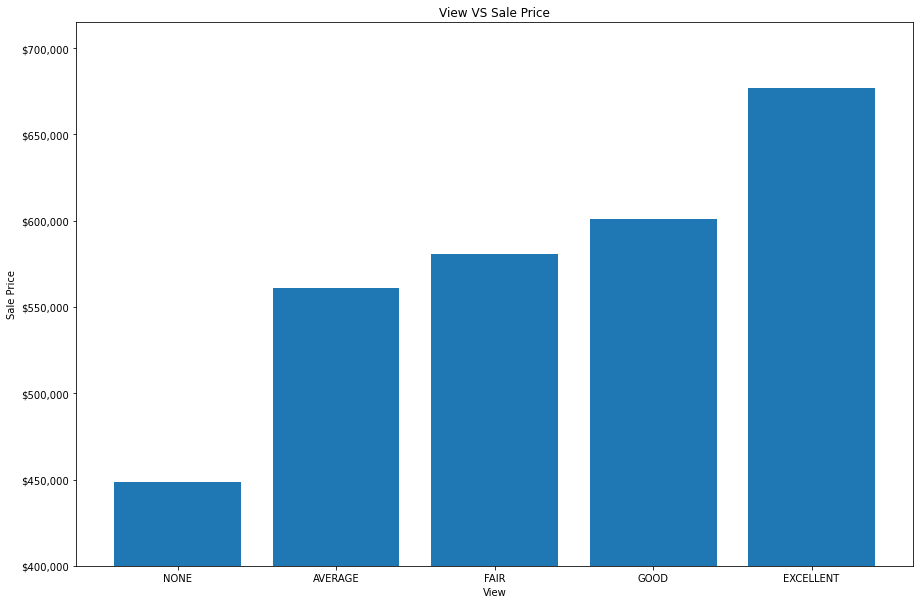

In [165]:
fig, ax = plt.subplots(figsize = (15, 10))

x = view_graph.index
y = view_graph['price'] 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_title('View VS Sale Price')
ax.set_xlabel('View')
ax.set_ylabel('Sale Price')
ax.set_ylim([400000, 715000])


ax.bar(x, y)

plt.savefig('view.png')